In [0]:
import numpy as np
import cv2
import torch
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import torch.nn.functional as F
from black_box_model import ModelPyTorch
from utils import load_images_google, load_images_imagenet, load_image, load_idx2label
from attack import pixel_attack
%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
# index to name of class translator
idx2label, _ = load_idx2label()

In [7]:
# loading any pytorch model
alexnet = models.alexnet(pretrained=True)
model_ = ModelPyTorch(alexnet)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.torch/models/alexnet-owt-4df8aa71.pth
244418560it [00:02, 107015852.58it/s]


In [0]:
# imagenet dataset (to load this dataset you should have unziped ILSVRC2012_img_val.tar or few images from it with mask such as ILSVRC2012_val_*.JPEG)
imagenet_images = load_images_imagenet()
# random images from google (to load this dataset you can unzip images.zip)
from_google = load_images_google()
# self-made dataset, list of (path to image, index of label)
my_dataset = [('4131178806_e6d7696f5b.jpg', 750)]

37434
pillow


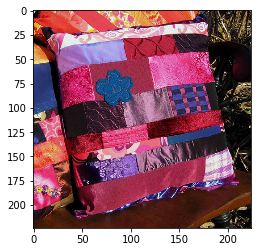

In [60]:
# if interesting you can change dataset
img, label_idx = load_image(imagenet_images, show_ind=True)

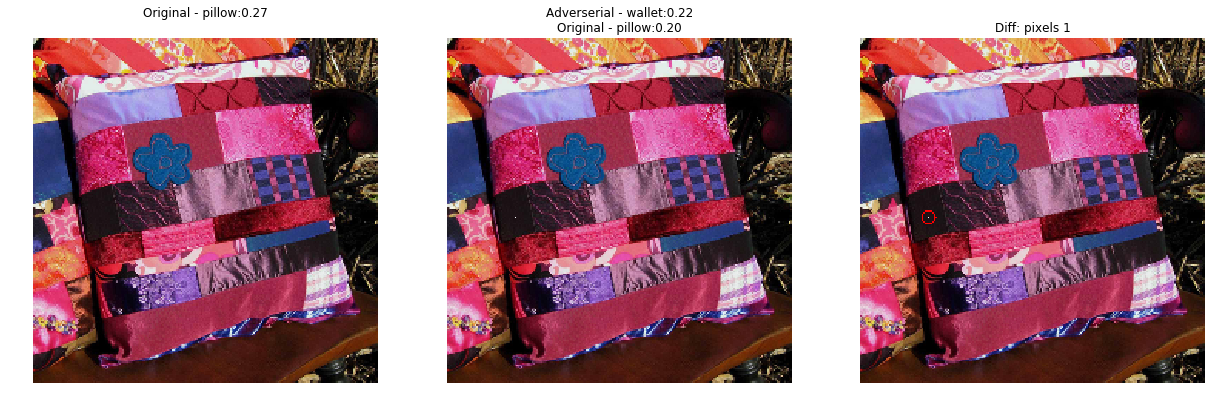

expected: 0.20131136


In [64]:
adversarial = pixel_attack(img, label_idx, model_, pixels_per_iter=1, max_pixels=1, population_size = 400, max_iters=100, show_info=True, no_changes_max_iters=10)